# ***Exp: 1***

Archive:  /content/archive (1).zip
  inflating: placement.csv           
78.0730147510384
Enter CGPA: 8.98


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted package for CGPA 8.98: 4.114296799114232


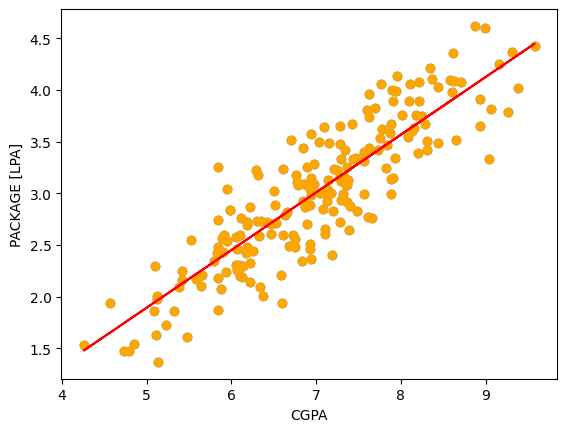

In [ ]:
!unzip "/content/archive (1).zip"

import numpy as np # linear algebra
import pandas as pd #preprocessing
import matplotlib.pyplot as plt #visualization
import sklearn as skt #ML model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/placement.csv')
df.head()

plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('PACKAGE [LPA]')

x = df.iloc[:, 0:1]
y = df.iloc[:, -1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(x_train,y_train)

plt.scatter(df['cgpa'],df['package'],color='Orange')
plt.plot(x_train,lr.predict(x_train),color='Red')
plt.xlabel('CGPA')
plt.ylabel('PACKAGE [LPA]')

r2_score = lr.score(x_test,y_test)
print(r2_score*100)

cgpa = float(input("Enter CGPA: "))
package_prediction = lr.predict(np.array([[cgpa]]))
print("Predicted package for CGPA {}: {}".format(cgpa, package_prediction[0]))

# ***Exp: 2***

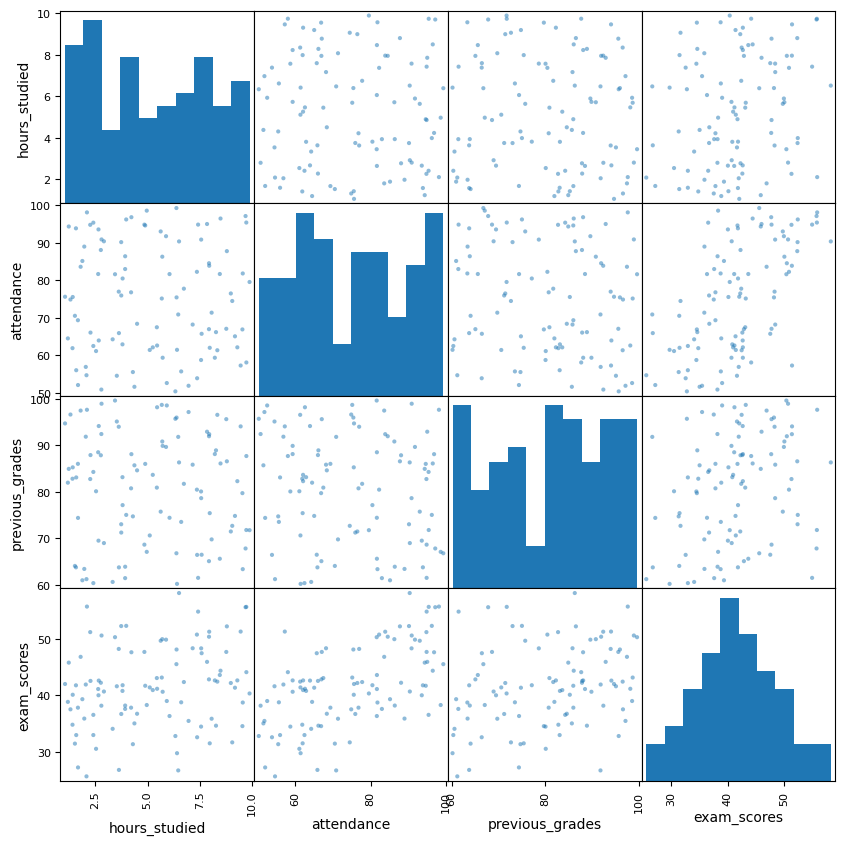

Mean Squared Error: 52.53948902990701
R^2 Score: 0.014734855962687865
Enter the number of Hours Studied : 16
Enter the attendance :98
Enter the previus Exam grade :99
Predicted Score:  64.40


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 100
hours_studied = np.random.uniform(1, 10, num_samples)
attendance = np.random.uniform(50, 100, num_samples)
previous_grades = np.random.uniform(60, 100, num_samples)

# Generate exam scores with some added noise
exam_scores = 0.5 * hours_studied + 0.3 * attendance + 0.2 * previous_grades + np.random.normal(0, 5, num_samples)

# Create a DataFrame
data = pd.DataFrame({
    'hours_studied': hours_studied,
    'attendance': attendance,
    'previous_grades': previous_grades,
    'exam_scores': exam_scores
})

# Save dataset to CSV
data.to_csv('student_exam_scores.csv', index=False)

# Plot the data
pd.plotting.scatter_matrix(data, figsize=(10, 10))
plt.show()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

data = pd.read_csv('student_exam_scores.csv')
X = data[['hours_studied', 'attendance', 'previous_grades']]
y = data['exam_scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

def predict_exam_score(hours_studied, attendance, previous_grades):
    input_data = pd.DataFrame({
        'hours_studied': [hours_studied],
        'attendance': [attendance],
        'previous_grades': [previous_grades]
    })
    predicted_score = model.predict(input_data)
    return predicted_score[0]

hours_studied = input("Enter the number of Hours Studied : ")
attendance = input("Enter the attendance :")
previous_grades = input("Enter the previus Exam grade :")
predicted_score = predict_exam_score(hours_studied, attendance, previous_grades)
print(f'Predicted Score:  {predicted_score:.2f}')

# ***Exp: 3***

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Generate an artificial dataset
data = {
    'email_text': [
        "Win a free lottery ticket now", "Important update on your account",
        "Congratulations, you have won a prize", "Meeting scheduled for tomorrow",
        "Discount on your next purchase", "Please review the attached document",
        "This is not a spam message", "Get cheap medicine online",
        "Exclusive offer just for you", "Project deadline next week"
    ],
    'label': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]  # 1 for spam, 0 for not spam
}
df = pd.DataFrame(data)

# Split the dataset into features (X) and target (y)
X = df['email_text']
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the Naive Bayes model
nb_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_vec)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"]))


Naive Bayes Model Accuracy: 0.00%

Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.00      0.00      0.00       1.0
        Spam       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



# ***Exp: 4***

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Accuracy: 97.05%


# ***Exp: 5***

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Simulate a dataset with 2 classes (tumor vs. no tumor)
# 1000 samples, 20 features, with 2 informative features, and 10 redundant ones.
X, y = make_classification(
    n_samples=10000,       # Number of samples
    n_features=20,        # Total features
    n_informative=2,      # Informative features (simulating important MRI characteristics)
    n_redundant=10,       # Redundant features
    n_classes=2,          # Number of classes (tumor and no tumor)
    random_state=42
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # 'linear' kernel for simplicity

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Tumor', 'Tumor'])

# Print the results
print(f"SVM Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(report)


SVM Model Accuracy: 88.70%

Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.88      0.89      0.89      1006
       Tumor       0.89      0.88      0.89       994

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



# ***Exp: 6***

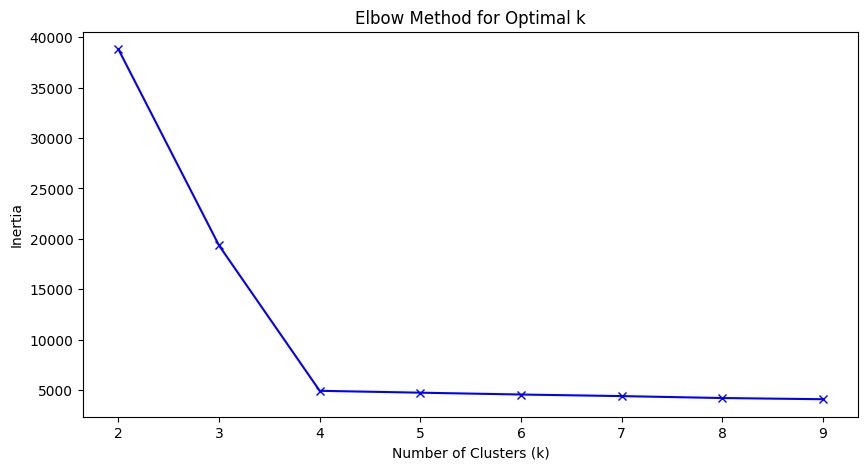

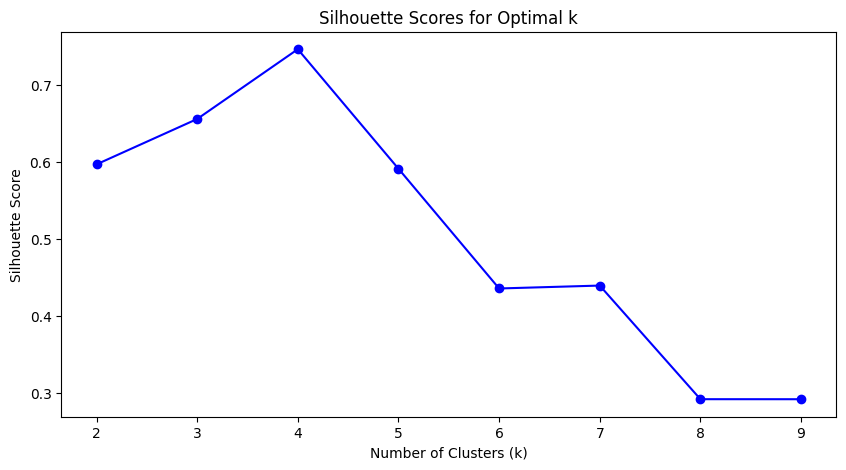

Optimal number of clusters (k): 4
Final Inertia: 4939.550933836138
Silhouette Score for k=4: 0.75


In [ ]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data to simulate social media users with different attributes
# 1000 samples, with 5 features each representing user characteristics
X, _ = make_blobs(
    n_samples=1000,    # Number of samples
    n_features=5,      # Features representing user characteristics
    centers=4,         # Initial number of centers (we'll validate this)
    cluster_std=1.0,   # Standard deviation of clusters
    random_state=42
)

# Finding the optimal number of clusters using the Elbow method
inertia = []   # List to hold the inertia values for each k
silhouette_scores = []  # List to hold silhouette scores for each k
K = range(2, 10)   # Range of clusters to try

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow curve for Inertia
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot the Silhouette Score to analyze clustering quality
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')
plt.show()

# Choose the optimal number of clusters (e.g., based on the Elbow point or highest silhouette score)
optimal_k = 4  # For example, if we see k=4 has a good balance in the graphs
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X)

# Final evaluation metrics
print(f"Optimal number of clusters (k): {optimal_k}")
print(f"Final Inertia: {kmeans_optimal.inertia_}")
print(f"Silhouette Score for k={optimal_k}: {silhouette_score(X, kmeans_optimal.labels_):.2f}")


# ***Questions***